In [452]:
# a simple fully connected neural network with one hidden layer
# resource: http://cs231n.github.io/neural-networks-case-study/

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

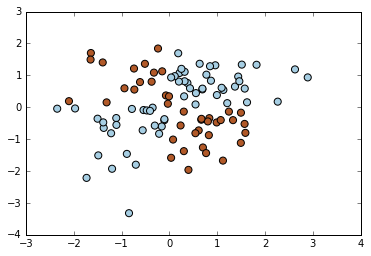

In [453]:
N = 100  # number of examples (data points)
D = 2  # number of features (dimensionality of the data)
K = 2  # number of classes

# generate and plot a dataset
X = np.random.randn(N, D)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int)
plt.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap=plt.cm.Paired)

In [454]:
# initialize model parameters
H = 50  # number of neurons in the hidden layer

# hidden layer
W0 = 0.01 * np.random.rand(D, H)
b0 = np.zeros((1, H))

# output layer
W1 = 0.01 * np.random.randn(H, K)
b1 = np.zeros((1, K))

In [455]:
# gradient descent loop
num_epochs = 500
learning_rate = 1

for epoch in range(num_epochs):
    # forward pass

    # hidden layer
    z0 = np.dot(X, W0) + b0
    # relu function
    r = np.maximum(0, z0)

    # output layer
    z1 = np.dot(r, W1) + b1
    # softmax function
    p = np.exp(z1)
    p = p / np.sum(p, axis=1, keepdims=True)

    # evaluate the loss function
    L_i = - np.log(p[range(N), y]) / N
    L = np.sum(L_i)

    # backward pass

    # how every z1 influences the L
    dz1 = p.copy()
    dz1[range(N), y] -= 1
    dz1 /= N

    # local gradients for W1, b1 and r
    # multiplied with dz1 (gradient from the top)
    dr = np.dot(dz1, W1.T)
    dW1 = np.dot(r.T, dz1)
    db1 = np.sum(dz1, axis=0, keepdims=True)

    # how outputs r influence the L
    # multiplied with dr (gradient from the top)
    dz0 = dr
    dz0[z0 < 0] = 0

    # local gradients for W0 and b0
    # multiplied with dz0 (gradient from the top)
    dW0 = np.dot(X.T, dz0)
    db0 = np.sum(dz0, axis=0, keepdims=True)
    
    # parameter update
    W1 += - learning_rate * dW1
    b1 += - learning_rate * db1
    W0 += - learning_rate * dW0
    b0 += - learning_rate * db0

    print("Epoch {:d} - train_loss {:f}".format(epoch, L))

Epoch 0 - train_loss 0.692842
Epoch 1 - train_loss 0.680261
Epoch 2 - train_loss 0.676826
Epoch 3 - train_loss 0.675607
Epoch 4 - train_loss 0.674840
Epoch 5 - train_loss 0.674052
Epoch 6 - train_loss 0.673079
Epoch 7 - train_loss 0.671823
Epoch 8 - train_loss 0.670193
Epoch 9 - train_loss 0.668091
Epoch 10 - train_loss 0.665412
Epoch 11 - train_loss 0.662045
Epoch 12 - train_loss 0.657890
Epoch 13 - train_loss 0.652873
Epoch 14 - train_loss 0.646985
Epoch 15 - train_loss 0.640241
Epoch 16 - train_loss 0.632697
Epoch 17 - train_loss 0.624489
Epoch 18 - train_loss 0.615760
Epoch 19 - train_loss 0.606591
Epoch 20 - train_loss 0.597237
Epoch 21 - train_loss 0.587848
Epoch 22 - train_loss 0.578294
Epoch 23 - train_loss 0.568535
Epoch 24 - train_loss 0.558792
Epoch 25 - train_loss 0.548974
Epoch 26 - train_loss 0.539014
Epoch 27 - train_loss 0.529163
Epoch 28 - train_loss 0.519565
Epoch 29 - train_loss 0.510231
Epoch 30 - train_loss 0.501146
Epoch 31 - train_loss 0.492107
Epoch 32 - train_l

In [456]:
# print the training accuracy
pred = np.argmax(p, axis=1)
acc = np.mean(np.equal(pred, y))
print("Training accuracy: {:f}".format(acc))

Training accuracy: 1.000000


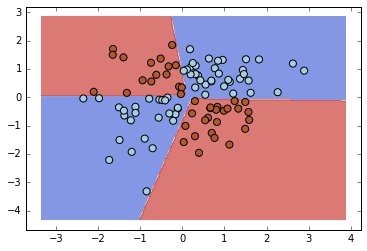

In [457]:
# plot the decision boundaries
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

z0 = np.dot(np.c_[xx.ravel(), yy.ravel()], W0) + b0
r = np.maximum(0, z0)

z1 = np.dot(r, W1) + b1
p = np.exp(z1)
p = p / np.sum(p, axis=1, keepdims=True)
pred = np.argmax(p, axis=1)
pred = pred.reshape(xx.shape)

plt.contourf(xx, yy, pred, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap=plt.cm.Paired)